In [5]:
import pandas as pd

df = pd.read_csv("../../membershipchainservice/Data/comparison_join_working_big.txt")
df["processed_time"] = pd.to_numeric(df["Time"]).apply(lambda x: x/1000)
df
max_time = max(df["processed_time"])

In [6]:
order_categ = ["Wants","Don't Manage", "Manage", "Manage Normally"]
nodes = list(df["Name"].unique())
print(order_categ)
dataset = []
d_wo = []
for n in nodes:
    df_filtered = df[df["Name"] == n][df["Registration"].isin(order_categ)].filter(items=["Registration", "processed_time"])
    df_dict = {r[1][0] : r[1][1] for r in df_filtered.iterrows()}
    
    vals = [df_dict.get(o,0) for o in order_categ]
    
    values= []
    wo = []
    display(df_filtered)
    print(n,len(df_dict))
    
    if len(df_dict) == 1:
        values = [0,0, 0, max_time]
        wo = [0,0, 0, max_time]
    elif len(df_dict) == 2: 
        values = [vals[0], vals[2]-vals[0],0, max_time-vals[2]]
        wo = [vals[0],max_time-vals[0],0,0]
    elif len(df_dict) == 3:
        values = [vals[0], vals[1]-vals[0], vals[3]-vals[1], max_time-vals[3]]
        wo = [vals[0],max_time-vals[0],0,0]
    else:
        values = vals
        wo = vals
            
    values.append(n)
    wo.append(n)
    dataset.append(values)
    d_wo.append(wo)


df_bars_control_plane = pd.DataFrame(dataset, columns=["Enter", "Wait", "Refused", "Accepted", "Name"])
df_bars_wo_control_plane = pd.DataFrame(d_wo, columns=["Enter", "Wait", "Refused", "Accepted", "Name"])

['Wants', "Don't Manage", 'Manage', 'Manage Normally']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,Registration,processed_time
0,Manage Normally,0.0


node_0 1


,Registration,processed_time
1,Manage Normally,0.0


node_2 1


,Registration,processed_time
2,Manage Normally,0.0


node_1 1


,Registration,processed_time
3,Manage Normally,0.0


node_3 1


,Registration,processed_time
5,Wants,2.501
6,Manage,2.521


node_4 2


,Registration,processed_time
8,Wants,9.572
9,Manage,9.596


node_5 2


,Registration,processed_time
10,Wants,10.572
11,Don't Manage,10.573
17,Manage Normally,14.107


node_6 3


,Registration,processed_time
12,Wants,11.574
13,Don't Manage,11.576
18,Manage Normally,14.107


node_7 3


,Registration,processed_time
14,Wants,12.572
16,Don't Manage,14.004
19,Manage Normally,14.107


node_8 3


,Registration,processed_time
20,Wants,19.606
22,Don't Manage,21.001
23,Manage Normally,21.158


node_9 3


,Registration,processed_time
24,Wants,23.734
25,Manage,23.768


node_10 2


,Registration,processed_time
27,Wants,28.876
28,Manage,28.916


node_12 2


,Registration,processed_time
29,Wants,33.873
31,Don't Manage,35.002
32,Manage Normally,35.273


node_11 3


,Registration,processed_time
33,Wants,37.944
34,Manage,37.980


node_13 2


,Registration,processed_time
35,Wants,38.945
36,Don't Manage,38.946
38,Manage Normally,42.358


node_14 3


,Registration,processed_time
39,Wants,48.200
41,Don't Manage,49.005
42,Manage Normally,49.423


node_15 3


,Registration,processed_time
43,Wants,50.289
45,Manage,50.375


node_16 2


,Registration,processed_time
44,Wants,50.289
46,Manage,50.376


node_18 2


,Registration,processed_time
47,Wants,53.292
48,Don't Manage,53.293
50,Manage Normally,57.033


node_17 3


<Figure size 432x288 with 0 Axes>

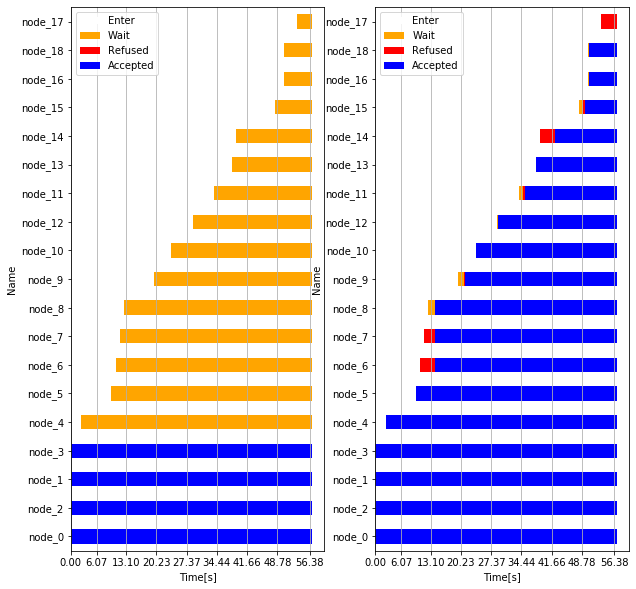

In [34]:
import matplotlib.pyplot as plt
plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=2) 
size=10

ticks = list(df[df["Registration"]=="starts epoch"]["processed_time"])

df_bars_control_plane.set_index("Name").plot.barh(stacked=True,
                                                        figsize=(size, size),
                                                        xticks=ticks,
                                                        color=["white", "orange", "red", "blue"],
                                                        ax=axes[1]
                                                       )
axes[1].set_xlabel("Time[s]")
axes[1].grid(axis="x")
axes[1].legend(loc="upper left")


df_bars_wo_control_plane.set_index("Name").plot.barh(stacked=True,
                                                        figsize=(size, size),
                                                        xticks=ticks,
                                                        color=["white", "orange", "red", "blue"], 
                                                        ax=axes[0]
                            
                                                       )
axes[0].set_xlabel("Time[s]")
axes[0].grid(axis="x")
axes[0].legend(loc="upper left")

fig.savefig('../../latex/thesis_template/figures/JoinSubplots.pdf')
